In [48]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import time

In [49]:
def draw_transition_matrix(T,size):
    matrix=np.zeros((size,size))
    for i in range(T.shape[0]):
        matrix[T[i][0]-1][T[i][1]-1]=T[i][2]
    return matrix

In [50]:
def value_iteration(T,gamma,epsilon,R):
    size=len(R)
    actions=T.shape[0]
    Q=pd.DataFrame(np.zeros((size,actions)))
    v=np.zeros((size,1))
    iterations=0
    policy=np.zeros((size,1))
    Vold=np.zeros((size,1))+epsilon+2
    iterations=0
    start=time.time()
    history=v
    while True: #int(max(abs(Vold-v))) > epsilon:
        for i in range(actions):
            Q.iloc[:,i]=R+gamma*(np.dot(T[i],v))
        Vold=v
        v=np.array([Q.max(1)]).T
        history=np.append(history,v,axis=1)
        policy=Q.idxmax(1)
        iterations=iterations+1

        if max(abs(Vold-v)) < epsilon:
            print (iterations*size*actions)
            end=time.time()
            print(end-start)
            break
    return v,policy,history

In [51]:
def policy_iteration(T,gamma,epsilon,R):
    size=len(R)
    actions=T.shape[0]
    Q=pd.DataFrame(np.zeros((size,actions)))
    policy=np.ones((size,1))*random.randint(0, actions-1)
    Tpi=T[0]*0
    v=np.zeros((size,1))
    iterations=0
    p_test=np.ones((size,1))*1000
    vold=np.ones((size,1))*1000
    start=time.time()
    while 1000 in p_test:
        for i in range(size):
            Tpi[i]=T[int(policy[i])][i]
        v=np.dot(np.linalg.inv(np.identity(size)-gamma*Tpi),R)
        for i in range(actions):
            Q.iloc[:,i]=R+gamma*np.dot(T[i],v)
            #Q.iloc[:,i]=np.dot(T[i],gamma*v+R)
        policy_value=np.array([Q.idxmax(1)]).T
        iterations=iterations+size**1.4
        value=np.array([Q.max(1)]).T
        if np.all(policy_value==policy):
            p_test=policy
            print (iterations)
            end=time.time()
            print(end-start)
            break
        else:
            policy=policy_value
    return policy,value

In [52]:
def plot_images(value,number):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 3
    rows = 4
    for i in range(1, number +1):
        fig.add_subplot(rows, columns, i)
        plt.title('andar'+str(i))
        plt.imshow(value[(i-1)*135:i*135].reshape((9,15)), cmap='gray',interpolation='nearest')
    plt.show()

In [53]:
def policy_iteration_m(T,gamma,epsilon,R):
    size=len(R)
    actions=T.shape[0]
    Q=pd.DataFrame(np.zeros((size,actions)))
    policy=np.ones((size,1))*random.randint(0, actions-1)
    Tpi=T[0]*0
    #v=np.zeros((size,1))*1000
    v=np.zeros((size,1))*0
    iterations=0
    #p_test=np.ones((size,1))*1000
    #vold=np.ones((size,1))*1000
    #value=np.ones((size,1))*10000
    p_test=np.ones((size,1))*0
    vold=np.ones((size,1))*0
    value=np.ones((size,1))*0
    start=time.time()
    history=value
    #while 1000 in p_test:
    while True:
        #iterations=iterations+size**1.4
        for i in range(size):
            Tpi[i]=T[int(policy[i])][i]
        v=np.dot(np.linalg.inv(np.identity(size)-gamma*Tpi),R)
        for i in range(actions):
            Q.iloc[:,i]=R+gamma*np.dot(T[i],v)
            iterations=iterations+size**1.4
            #Q.iloc[:,i]=np.dot(T[i],gamma*v+R)
        policy_value=np.array([Q.idxmax(1)]).T
        vold=value
        value=np.array([Q.max(1)]).T
        history=np.append(history,value,axis=1)
        if max(abs(vold-value)) < epsilon:
            p_test=policy
            print (iterations)
            end=time.time()
            print(end-start)
            break
        else:
            policy=policy_value
    return policy,value,history


In [54]:
def prioritized_sweeping(T,gamma,epsilon,R):
    size=len(R)
    actions=T.shape[0]
    Q=pd.DataFrame(np.zeros((size,actions)))
    v=np.zeros((size,1))+epsilon+2
    iterations=0
    policy=np.zeros((size,1))
    Vold=np.zeros((size,1))
    iterations=0
    start=time.time()
    H=np.random.rand(size,1)+epsilon
    while True: 
        state=H.argmax()
        for i in range(actions):
            Q.iloc[:,i]=R+gamma*(np.dot(T[i],v))
        Vold=float(v[state])
        v[state]=Q.iloc[state,:].max()
        policy=Q.iloc[state,:].idxmax()
        delta=([abs(Vold-v[state])])
        iterations=iterations+1
        for i in range(actions):
            H=np.maximum(H,delta*np.array([T[i][state]]).T)
            if i==0:
                H[state]=delta*np.array([T[i][state]]).T[state]
        if  np.max(H) < epsilon:
            print (iterations)
            end=time.time()
            print(end-start)
            break
    return v,policy

In [55]:
T1=np.loadtxt("Action01.txt")
T2=np.loadtxt("Action02.txt")
T3=np.loadtxt("Action03.txt")
T4=np.loadtxt("Action04.txt")
T5=np.loadtxt("Action05.txt")
T6=np.loadtxt("Action06.txt")
R=np.loadtxt("Rewards.txt")
R=np.array([R]).T

In [56]:
T1=draw_transition_matrix(T1,T1.max())
T2=draw_transition_matrix(T2,T2.max())
T3=draw_transition_matrix(T3,T3.max())
T4=draw_transition_matrix(T4,T4.max())
T5=draw_transition_matrix(T5,T5.max())
T6=draw_transition_matrix(T6,T6.max())

/home/lucas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/lucas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [57]:
T=np.array((T1,T2,T3,T4,T5,T6))

1425600
3.6542701721191406


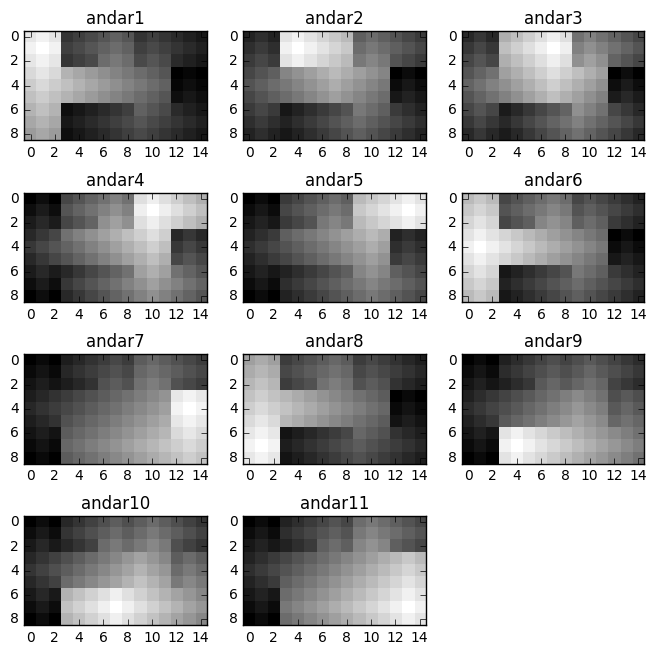

In [68]:
v_vi,p_vi,h_vi=value_iteration(T,0.99,0.1,R)
plot_images(v_vi,11)

3087699.715555749
105.74053144454956


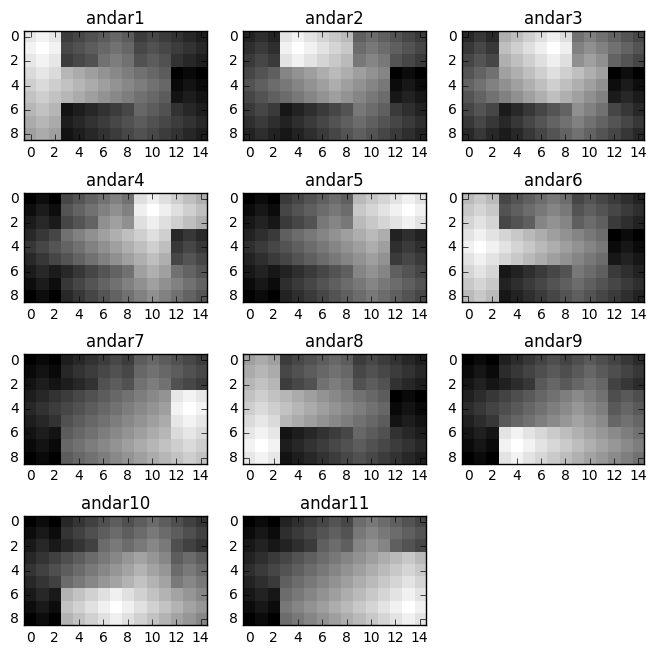

In [59]:
p_pi,v_pi=policy_iteration(T,0.99,0.1,R)
plot_images(v_pi,11)

19022435.747620147
102.5059802532196


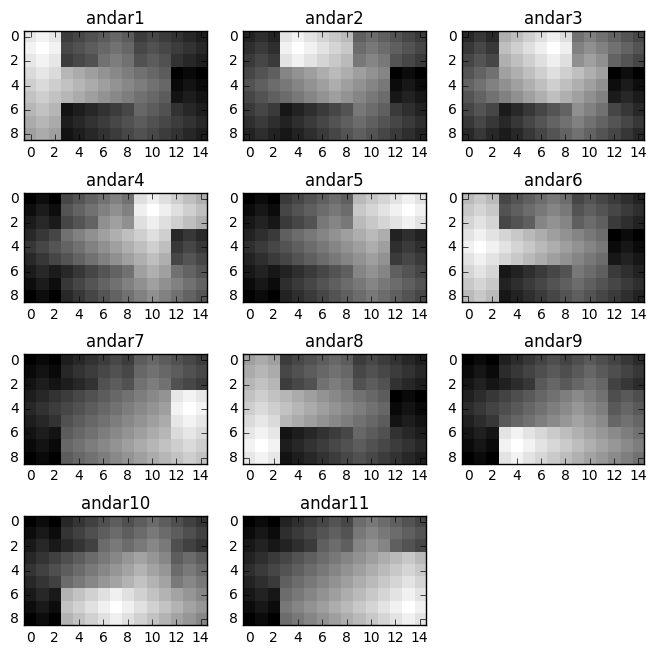

In [60]:
p_pim,v_pim,h=policy_iteration_m(T,0.99,0.1,R)
plot_images(v_pim,11)

In [62]:
v_ps,p_ps=prioritized_sweeping(T,0.99,0.1,R)

73532
34444.66057109833


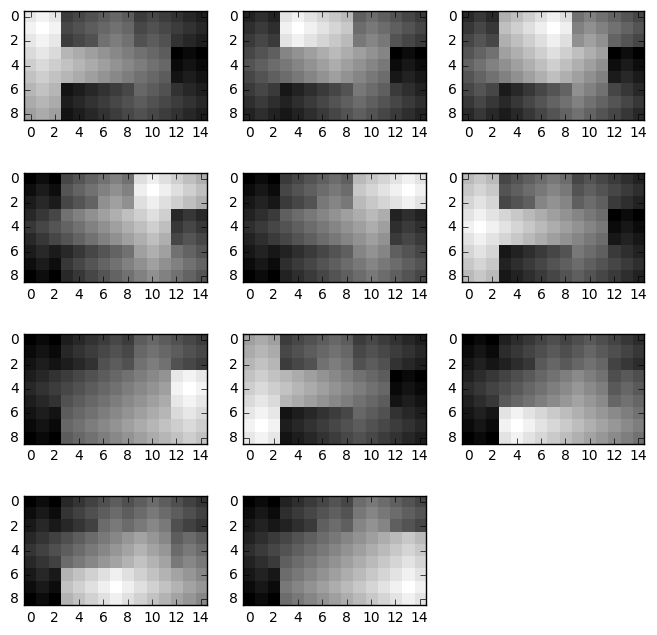

In [66]:
plot_images(v_pim,11)

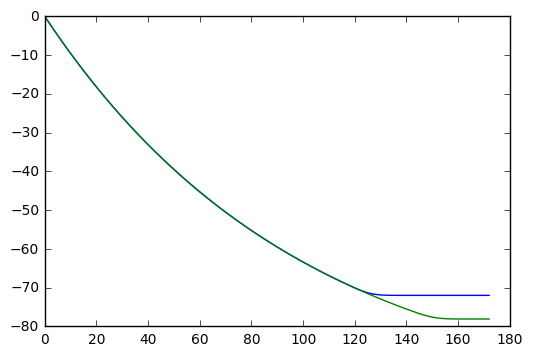

In [18]:
##plot valores do v
plt.plot(h_vi[220])
plt.plot(h_vi[10])
plt.show()

In [ ]:
34400/3600